# Single Layer Perceptron in Julia
#### Isabel De La Cruz


### Understanding Single Layer Perceptron

The Percepton algorithm was introduced by Frank Rosenblatt in 1957. It was intended to be a machine, after proving the perceptons could not be trained to recognize many classes of patterns, it was used as a program. This algorithm is for supervised learning of binary classifiers. A binary classier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. A perception consist of four parts: input values or one input layer, weights and bias, net sum and activiation funtion. 

Single-layer perceptron is the first proposed neural model created. It is only capable of learning linearly separable patterns. The computation of perceptron is the calculation of sum of input vector with the value multiplied by corresponding vector weight. The displayed output value will be the input of an activation function. 


### Applying the Perceptrion Algortithm 

In [1]:
using RDatasets
using Plots

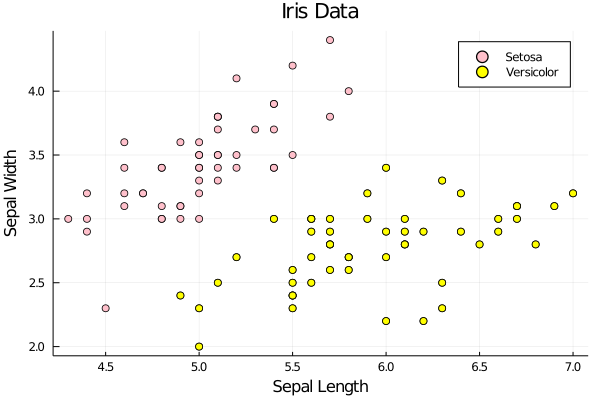

In [8]:
# Read the Iris dataset from RDatasets
iris = dataset("datasets", "iris")

# Extract first 2 columns and first 100 entries in the dataset
x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]

# converts the Species label numerically
y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100]

# Plot the data to confirm linearly separable
scatter(x_data[1:100], 
    label = "Setosa", 
    xaxis = "Sepal Length", 
    yaxis = "Sepal Width", 
    color = "pink",
    title = "Iris Data")

scatter!(x_data[51:100],
    color = "yellow",
    label = "Versicolor")

### Defining Functions:

#### Sign Function: 

weights:  the coefficients that define the 3-dimensional plane

x̂:        data stored for x from the data set

*Activates the Perceptron model using the Heaviside step function.*



In [16]:
#### The sign function call ####

function sign_func(weights, x)
    x̂ = [x[1], x[2], 1.0]
    return weights'x̂ > 0 ? 1 : -1
end


sign_func (generic function with 1 method)

#### Perceptron Learning Algorithm:

weights:  the coefficients that define the 3-dimensional plane

feature:  data stored for x from the data set

label:    numerical encoding of data's species

epsilon:  stopping point

*Iterates the Perception Update Rule by randomly testing the data set entries.*



In [21]:
#### The Perceptron Learning Algorithm ####
function perceptron_algorithm(weights, feature, label, ϵ)
    
    error_measurements = [] #Create empty vector to store errors
    append!(error_measurements, error(weights, feature, label))
    
    weight_vector = [] #Create empty vector to store weights

    while error(weights, feature, label) > ϵ
        for i = 1:length(feature)
           weights = update_perceptron(weights, feature[i], label[i])
        end
        
        #Add weights to weight vector
        append!(weight_vector, weights)
        
        #Adds errors to error vector
        append!(error_measurements, error(weights, feature, label))
    end
    return weights, weight_vector, error_measurements
end

perceptron_algorithm (generic function with 1 method)

In [22]:
# Run the function, Assign random weights to weights (weights = randn(3)), Assign a stopping point to epsilon
w, W, errors = perceptron_algorithm(randn(3), x_data, y_data, 2)

([-26.501128557077898, 39.33363299129202, 12.179764018656142], Any[-5.901128557077877, -3.866367008707963, -0.8202359813438578, -2.901128557077877, -0.5663670087079633, 0.17976401865614222, -4.8011285570778774, -0.2663670087079635, 0.17976401865614222, -6.701128557077878  …  11.179764018656142, -27.901128557077897, 36.53363299129202, 11.179764018656142, -29.101128557077896, 36.733632991292026, 11.179764018656142, -26.501128557077898, 39.33363299129202, 12.179764018656142], Any[50, 50, 50, 50, 50, 50, 50, 50, 50, 50  …  3, 29, 40, 36, 42, 3, 14, 33, 40, 2])

### Plot the learned alogrithm

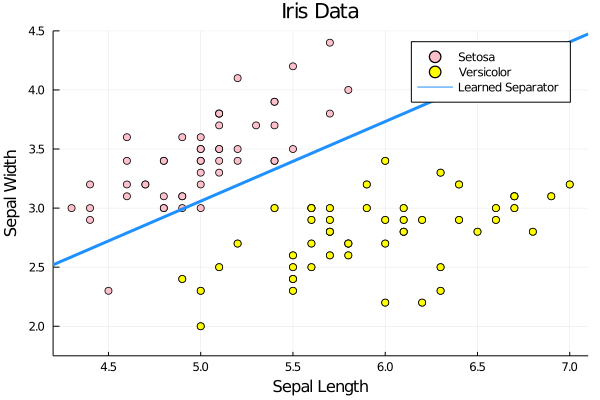

In [23]:
scatter(x_data[1:100], 
    label = "Setosa", 
    xaxis = "Sepal Length", 
    xlim = (4.2,7.1),
    yaxis = "Sepal Width", 
    ylim = (1.75,4.5),
    color = "pink",
    title = "Iris Data")

scatter!(x_data[51:100],
    color = "yellow",
    label = "Versicolor")

plot!(x -> (-x*w[1]-w[3])/w[2], 
    label = "Learned Separator", 
    color = "dodgerblue", lw = 3)